In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "./ex1data1.txt"
data = pd.read_csv(path,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


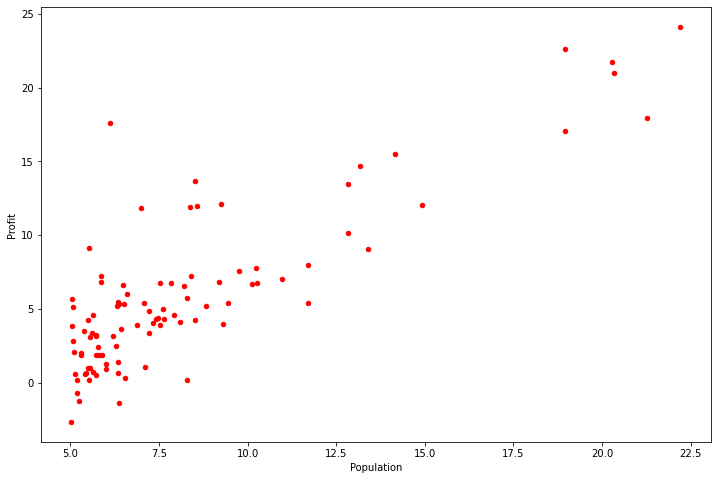

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8),color="red")
plt.show()


创建代价函数
首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [5]:
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T)-y),2)
    return (np.sum(inner))/ (2*len(X))
    
    

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [6]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


现在我们来做一些变量初始化。

In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#Y是所有行，最后一列


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [8]:
#初始化转换X与y

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))


In [9]:
computeCost(X, y, theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [10]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])# ravel, flatten将原数组压扁
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y#error和computeCost不是一个定义，computeCost是平方值（且方便求导） error则只是绝对值误差
        #更新theta
        for j in range(parameters):
            term = np.multiply(error, X[:,j])#注意这里是针对theta j求导，所以求导以后剩下的就是所有样本的Xj值
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        #更新完后赋值给原始theta
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [11]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
computeCost(X, y, g)

4.515955503078912

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

In [ ]:
#绘制线性模型
x = np.linspace(data.Population.min(), data.Population.max(), 100)